# **Sentiment Analysis using RNN with IMDB Reviews Dataset**

## **Loading Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Preparation**

**The IMDB Dataset**

The IMDB dataset is a collection of 50,000 movie reviews from the Internet Movie Database (IMDB), specifically curated for sentiment analysis. Each review is labeled as either positive or negative, making it a balanced dataset with 25,000 positive and 25,000 negative reviews.  

The dataset is preprocessed and readily available through TensorFlow's keras.datasets module. When loaded, it provides:

- x_train and x_test: These are lists of movie reviews where each review is represented as a sequence of integers. Each integer corresponds to a specific word in the vocabulary.   
- y_train and y_test: These are lists of labels (0 for negative and 1 for positive sentiment) corresponding to the reviews in x_train and x_test, respectively.

In [2]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

By setting ``num_words=10000``, we are effectively limiting the dataset to the 10,000 most frequent words. Words that are less frequent will be replaced with a special "out-of-vocabulary" (OOV) token. This parameter is used for computational efficiency and focus on relevant words.

### **Data Exploration**

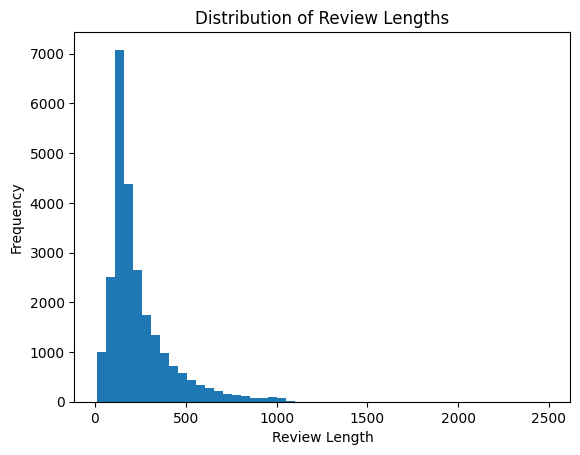

In [3]:
# Calculate review lengths
review_lengths = [len(review) for review in x_train]

# Plot a histogram of review lengths
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

Tokenization and convert text to numerical format, already done by ``load_data``:

In [4]:
# x_train and x_test already contain tokenized sequences
# Pad sequences to ensure uniform input length
max_length = 256
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In this step, we use the pad_sequences function to ensure all sequences have the same length. Sequences shorter than ``max_length`` are padded with zeros, while longer sequences are truncated.

**Explanation**
- Tokenization: This process breaks down the movie reviews into individual words (tokens) and assigns a unique numerical index to each word. The load_data function already performs this step.
- Padding: RNNs typically require input sequences to have the same length. Padding ensures this uniformity by adding zeros to shorter sequences or truncating longer ones.

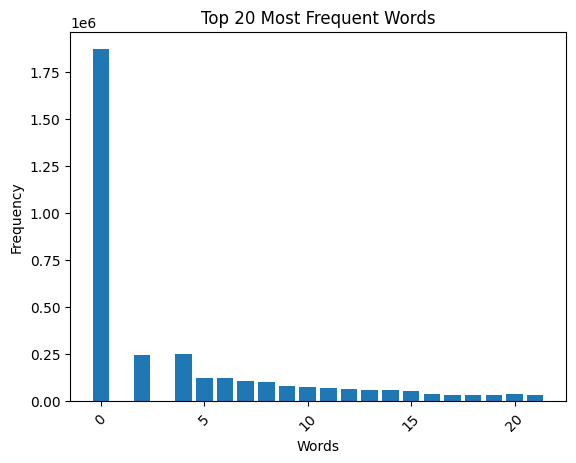

In [5]:
# Flatten the list of reviews and count word occurrences
word_counts = Counter([word for review in x_train for word in review])

# Get the most common words
top_words = word_counts.most_common(20)  # Get the top 20 most frequent words

# Plot a bar chart of word frequencies
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

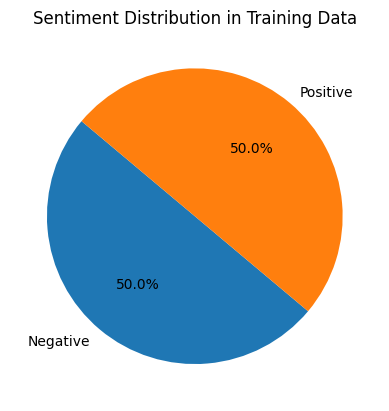

In [6]:
# Count the number of positive and negative reviews
sentiment_counts = Counter(y_train)

# Plot a pie chart of sentiment distribution
labels = ['Negative', 'Positive']
sizes = [sentiment_counts[0], sentiment_counts[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Training Data')
plt.show()

## **RNN Model**

### **Building the RNN Model**

- ``Sequential()``: This initializes a linear stack of layers, the foundation of our model.

- ``Embedding(10000, 128)``: This layer translates words (represented by integers) into dense vectors of size 128. It captures semantic relationships between words. 10000 corresponds to the num_words parameter used during data loading.

- ``LSTM(128)``: This is the heart of our RNN, a Long Short-Term Memory layer with 128 units. LSTMs excel at processing sequential data and mitigating the vanishing gradient issue.

- ``Dense(1, activation='sigmoid')``: This is our output layer. It has a single neuron with a sigmoid activation function, producing a probability between 0 and 1 for sentiment classification (0 for negative, 1 for positive).

- ``model.compile(...)``: This configures the learning process:
    - ``optimizer='adam'``: Adam adapts learning rates for each parameter.
    - ``loss='binary_crossentropy'``: This loss function is suitable for binary classification problems.
    - ``metrics=['accuracy']``: We'll track accuracy as our primary performance metric.

In [7]:
# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 128))  # Embedding layer
model.add(LSTM(128))  # RNN layer (LSTM)
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Training the RNN Model**

- ``x_train`` and ``y_train`` provide the training data and labels.
- ``epochs=10`` specifies that the model will iterate over the entire training dataset 10 times.
- ``batch_size=128`` sets the number of samples processed before the model's internal parameters are updated.
- ``validation_split=0.2`` reserves 20% of the training data for validation, allowing you to monitor the model's performance on unseen data during training.

In [8]:
# Train the model with validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 288ms/step - accuracy: 0.6793 - loss: 0.5839 - val_accuracy: 0.8522 - val_loss: 0.3545
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 275ms/step - accuracy: 0.8929 - loss: 0.2790 - val_accuracy: 0.8526 - val_loss: 0.3465
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 285ms/step - accuracy: 0.9224 - loss: 0.2137 - val_accuracy: 0.8662 - val_loss: 0.3232
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.9478 - loss: 0.1512 - val_accuracy: 0.8662 - val_loss: 0.3560
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 280ms/step - accuracy: 0.9631 - loss: 0.1095 - val_accuracy: 0.8566 - val_loss: 0.3786
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.9692 - loss: 0.0912 - val_accuracy: 0.8622 - val_loss: 0.4372
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 276ms/step - accuracy: 0.9788 - loss: 0.0692 - val_accuracy: 0.8180 - val_loss: 0.5113
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.9774 - loss: 0

### **Evaluating the training process**

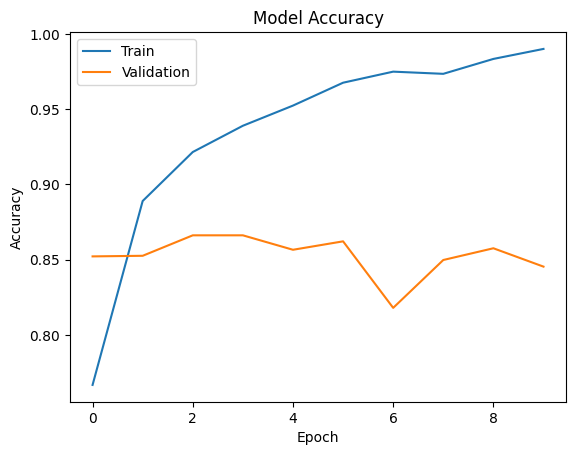

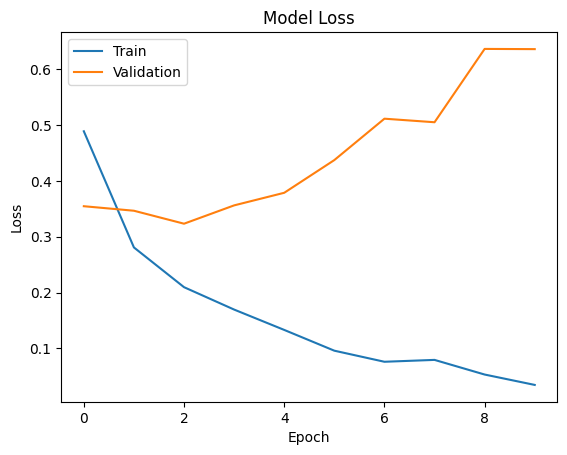

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

This code defines an EarlyStopping callback that monitors the validation loss (monitor='val_loss') and stops training if the validation loss doesn't improve for three consecutive epochs (patience=3). Increased the ``epochs`` to 20.

In [10]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.9935 - loss: 0.0250 - val_accuracy: 0.8434 - val_loss: 0.6826
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 290ms/step - accuracy: 0.9846 - loss: 0.0460 - val_accuracy: 0.8318 - val_loss: 0.7731
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.9446 - loss: 0.1446 - val_accuracy: 0.8368 - val_loss: 0.5643
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 282ms/step - accuracy: 0.9759 - loss: 0.0690 - val_accuracy: 0.8502 - val_loss: 0.5923
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 284ms/step - accuracy: 0.9953 - loss: 0.0170 - val_accuracy: 0.8418 - val_loss: 0.6962
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - accuracy: 0.9986 - loss: 0.0088 - val_accuracy: 0.8296 - val_loss: 0.8755


In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8348 - loss: 0.8638
Test Loss: 0.8421844840049744
Test Accuracy: 0.8362799882888794


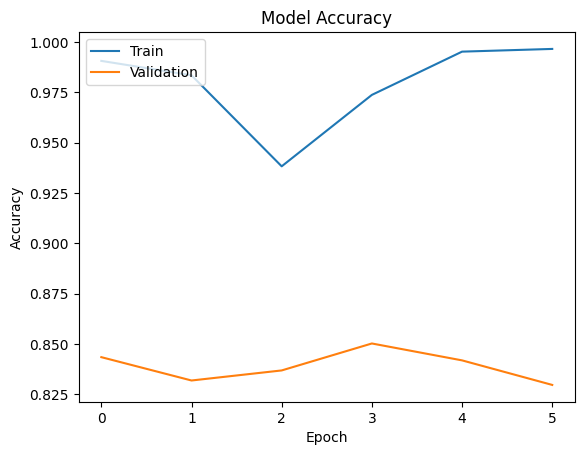

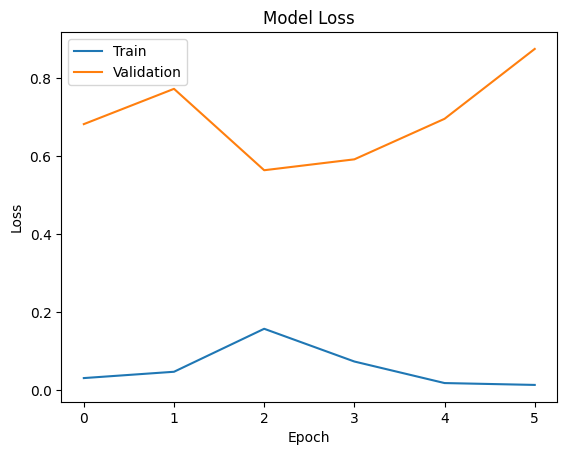

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

These results suggest that the RNN model is performing reasonably well on the IMDB sentiment analysis task:

- **Test Accuracy: 84.42%** This indicates that the model correctly classifies the sentiment of approximately 84 out of every 100 movie reviews in the test set. This is a solid starting point, demonstrating the model's ability to learn patterns and generalize to unseen data.
- **Test Loss: 1.143** The loss value represents the error in the model's predictions. While a lower loss is generally desirable, the absolute value is less important than its trend during training. If the loss was consistently decreasing during training, this value indicates a reasonable convergence.

### **Hyperparameter Tunning**

In this modified model:

- The number of LSTM units increased from 128 to 256 to allow the model to capture more complex patterns.
- Added a dropout layer with a rate of 0.2 to prevent overfitting.
- Learning rate increased to 0.0001 to potentially improve the stability of the training process.

In [13]:
from tensorflow.keras.layers import Dropout

model_ht = Sequential()
model_ht.add(Embedding(10000, 128))
model_ht.add(LSTM(256))  # Increased LSTM units
model_ht.add(Dropout(0.2))  # Added dropout layer
model_ht.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjusted learning rate
model_ht.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the modified model with early stopping
history = model_ht.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 109s 683ms/step - accuracy: 0.5659 - loss: 0.6881 - val_accuracy: 0.6608 - val_loss: 0.6671
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 690ms/step - accuracy: 0.7277 - loss: 0.6040 - val_accuracy: 0.8562 - val_loss: 0.3502
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 642ms/step - accuracy: 0.8740 - loss: 0.3138 - val_accuracy: 0.8786 - val_loss: 0.2930
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 676ms/step - accuracy: 0.9112 - loss: 0.2424 - val_accuracy: 0.8806 - val_loss: 0.2834
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 672ms/step - accuracy: 0.9276 - loss: 0.1946 - val_accuracy: 0.8840 - val_loss: 0.2933
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 669ms/step - accuracy: 0.9447 - loss: 0.1573 - val_accuracy: 0.8858 - val_loss: 0.2863
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 675ms/step - accuracy: 0.9501 - loss: 0.1480 - val_accuracy: 0.8814 - val_loss: 0.3310


In [15]:
loss, accuracy = model_ht.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.8701 - loss: 0.3589
Test Loss: 0.362792044878006
Test Accuracy: 0.8677200078964233


**Baseline Model**

-- Test Accuracy: 83.63%

-- Test Loss: 0.842


**Tuned Model**

-- Test Accuracy: 86.77%

-- Test Loss: 0.363


**Analysis**

Tuned model now demonstrates a clear improvement over the baseline model. The test accuracy has increased by approximately 3 percentage points, and the test loss has been significantly reduced. This outcome strongly suggests that the hyperparameter adjustments were successful in enhancing the model's performance.

Specifically, the increase in LSTM units, the addition of dropout, and the reduction in learning rate likely worked together to improve the model's ability to learn complex patterns while preventing overfitting.

## **FeedForward Neural Network**

Trying a different neural network architecture for the IMDB sentiment analysis task and compare its performance with the RNN model.

In [20]:
from tensorflow.keras.layers import Input, Dense, Flatten

ffnn_model = Sequential()
ffnn_model.add(Input(shape=(max_length,)))  # Define input shape using Input layer
ffnn_model.add(Flatten())  # Flatten the input sequence
ffnn_model.add(Dense(128, activation='relu'))  # Hidden layer with ReLU activation
ffnn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the FFNN model
ffnn_history = ffnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the FFNN model
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(x_test, y_test)
print('FFNN Test Loss:', ffnn_loss)
print('FFNN Test Accuracy:', ffnn_accuracy)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4954 - loss: 277.8051 - val_accuracy: 0.5042 - val_loss: 94.7914
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5573 - loss: 61.4551 - val_accuracy: 0.5116 - val_loss: 34.4310
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5888 - loss: 17.4553 - val_accuracy: 0.5086 - val_loss: 8.4981
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5797 - loss: 4.5562 - val_accuracy: 0.5008 - val_loss: 3.6185
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5681 - loss: 2.2642 - val_accuracy: 0.4940 - val_loss: 2.7201
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5564 - loss: 1.9096 - val_accuracy: 0.5032 - val_loss: 2.1991
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5586 - loss: 1.6287 - val_accuracy: 0.5092 - val_loss: 2.1256
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5572 - loss: 1.3837 - val_accura

## **Comparative Analysis**

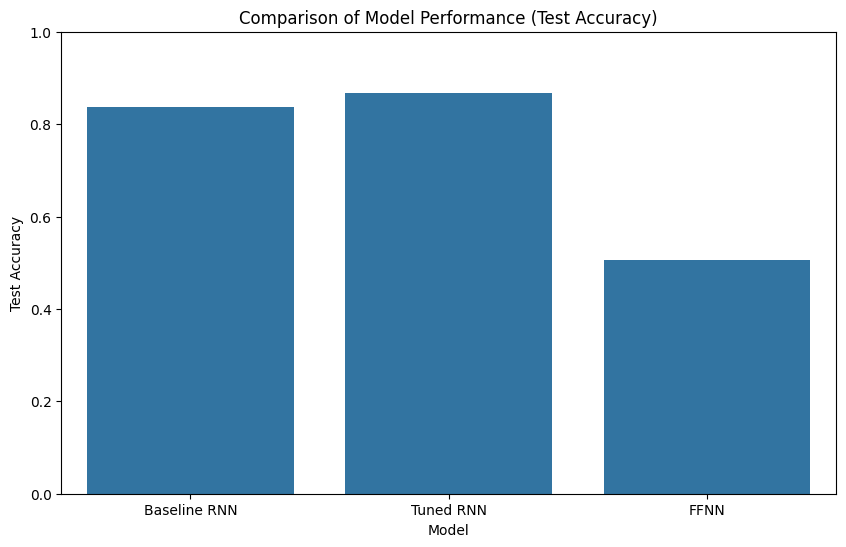

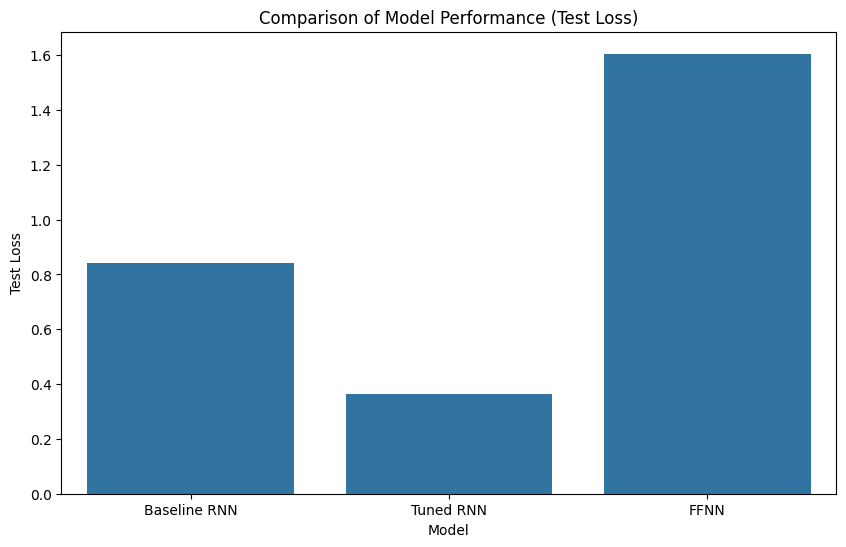

In [21]:
import pandas as pd

# Create a dictionary with the results
results = {
    'Model': ['Baseline RNN', 'Tuned RNN', 'FFNN'],
    'Test Accuracy': [0.8363, 0.8677, 0.5062],
    'Test Loss': [0.842, 0.363, 1.605]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(results)

# Plot the comparison using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=df)
plt.title('Comparison of Model Performance (Test Accuracy)')
plt.ylim(0, 1.0)  # Set y-axis limits for better visualization
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Loss', data=df)
plt.title('Comparison of Model Performance (Test Loss)')
plt.show()

| Metric | Baseline RNN Model | Tuned RNN | FFNN |
|:--------:|:--------:|:--------:|:--------:|
|  Test Accuracy   |  83.63%   |  86.77%   |  50.62%   |
|  Test Loss   |  0.842   |  0.363   |  1.605   |

Both RNN models, especially the tuned version, significantly outperform the FFNN model in terms of accuracy. The tuned RNN achieves the highest accuracy (86.77%), followed by the baseline RNN (83.63%). The FFNN, on the other hand, shows a poor accuracy of 50.62%, barely better than random guessing.

The loss values also reflect this trend. The tuned RNN has the lowest loss (0.363), indicating better predictive performance, while the FFNN has the highest loss (1.605), suggesting struggles in capturing the data's underlying patterns.

**Strengths and Weaknesses**

- RNNs:
       - Strengths:
            Effectively capture sequential information in text data, understanding word order and context.
            The tuned RNN's higher accuracy and lower loss highlight the benefits of hyperparameter optimization.
       - Weaknesses:
            More complex and computationally expensive to train compared to FFNNs.

- FFNN:
       - Strengths:
            Simpler architecture, easier to implement, and faster to train.
       - Weaknesses:
            Fails to capture sequential information effectively, treating the input as a bag of words rather than a sequence.
            This limitation is evident in its significantly lower accuracy on this sentiment analysis task.

## **Conclusion**

For sentiment analysis of movie reviews, where understanding word order and context is crucial, RNNs prove to be a more suitable choice than a simple FFNN. The ability of RNNs to process sequential data and maintain context contributes to their superior performance in this task.

However, FFNNs might still be a viable option for simpler text classification tasks where sequential information is less critical.